In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('fake_reviews_dataset.csv')
df.head()

,category,rating,text,label
0,Home_and_Kitchen,5.0,"Love this! Well made, sturdy, and very comfor...",1
1,Home_and_Kitchen,5.0,"love it, a great upgrade from the original. I...",1
2,Home_and_Kitchen,5.0,This pillow saved my back. I love the look and...,1
3,Home_and_Kitchen,1.0,"Missing information on how to use it, but it i...",1
4,Home_and_Kitchen,5.0,Very nice set. Good quality. We have had the s...,1


In [19]:
# Define the mapping dictionary for combining categories
cat_map_dict = {
    'Home Appliances': 'Home_and_Kitchen',
    'Sporting Goods': 'Sports_and_Outdoors',
    'Clothing': 'Clothing_Shoes_and_Jewelry',
    'Toys': 'Toys_and_Games',
    'Gardening': 'Tools_and_Home_Improvement'
}

# Map the categories and fill missing values with the original category
df['category'] = df['category'].map(cat_map_dict).fillna(df['category'])

# Remove rows with categories that need to be excluded
df = df[~df['category'].isin(['Beauty', 'Food', 'Automotive'])]

In [20]:
# Keep only fake reviews
df = df[df['label'] == 1]

In [11]:
import pyLDAvis
from pyLDAvis import prepare
from pyLDAvis import display
from pyLDAvis import save_html
import numpy as np

# Prepare data for pyLDAvis
def prepare_lda_vis(lda_model, X, vectorizer):
    data = {
        'topic_term_dists': np.array(lda_model.components_) / lda_model.components_.sum(axis=1)[:, np.newaxis],
        'doc_topic_dists': lda_model.transform(X),
        'doc_lengths': np.array(X.sum(axis=1)).flatten(),
        'vocab': vectorizer.get_feature_names_out(),
        'term_frequency': np.array(X.sum(axis=0)).flatten()
    }
    return prepare(**data)

# Visualize topics
panel = prepare_lda_vis(lda, X, vectorizer)
pyLDAvis.enable_notebook()
display(panel)


Category: Home_and_Kitchen
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 390.9088171983013
Number of Topics: 2, Perplexity: 386.03933586378065
Number of Topics: 3, Perplexity: 388.90810831536004
Number of Topics: 4, Perplexity: 392.14307052756567
Number of Topics: 5, Perplexity: 394.42237051615604
Early stopping triggered after 5 topics.


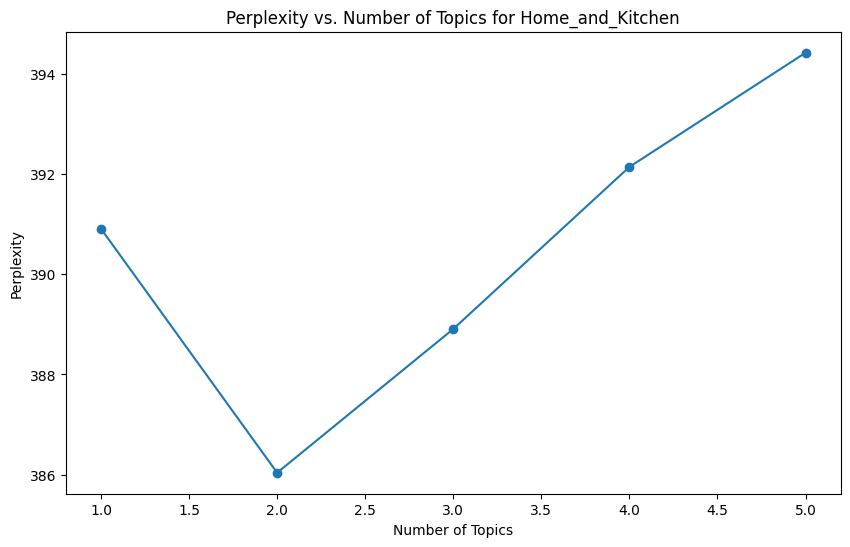

Optimal number of topics for Home_and_Kitchen: 2
Topics:
Topic 1:
great bought love nice good quality product just happy color
Topic 2:
easy use love great clean little like used small plastic
Topic Counts for Home_and_Kitchen: [1058  979]


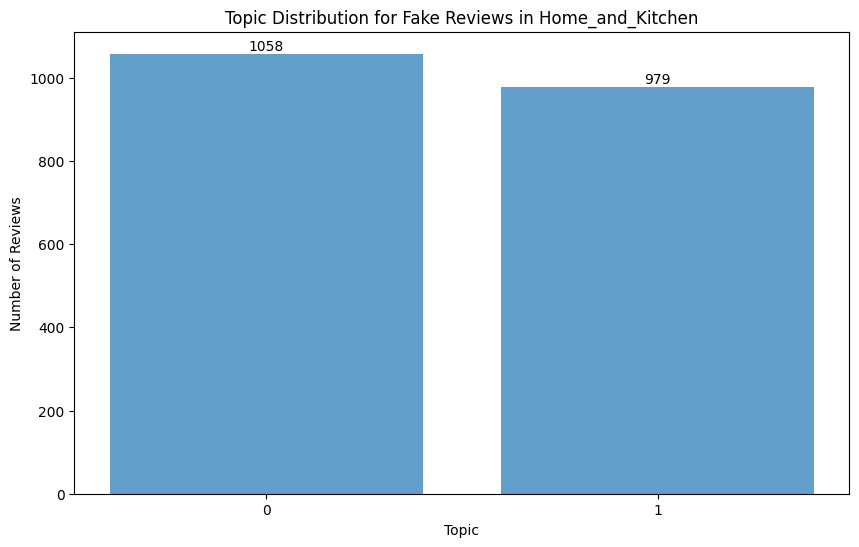


Category: Sports_and_Outdoors
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 444.1926907378738
Number of Topics: 2, Perplexity: 447.9554546997394
Number of Topics: 3, Perplexity: 446.72238076974674
Number of Topics: 4, Perplexity: 447.3975832473464
Early stopping triggered after 4 topics.


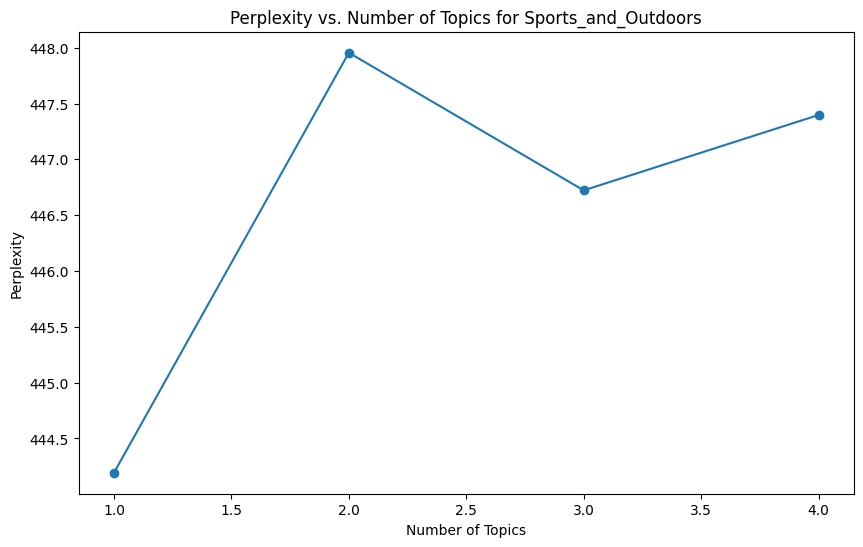

Optimal number of topics for Sports_and_Outdoors: 1
Topics:
Topic 1:
great little good use small product easy bought nice recommend
Topic Counts for Sports_and_Outdoors: [1980]


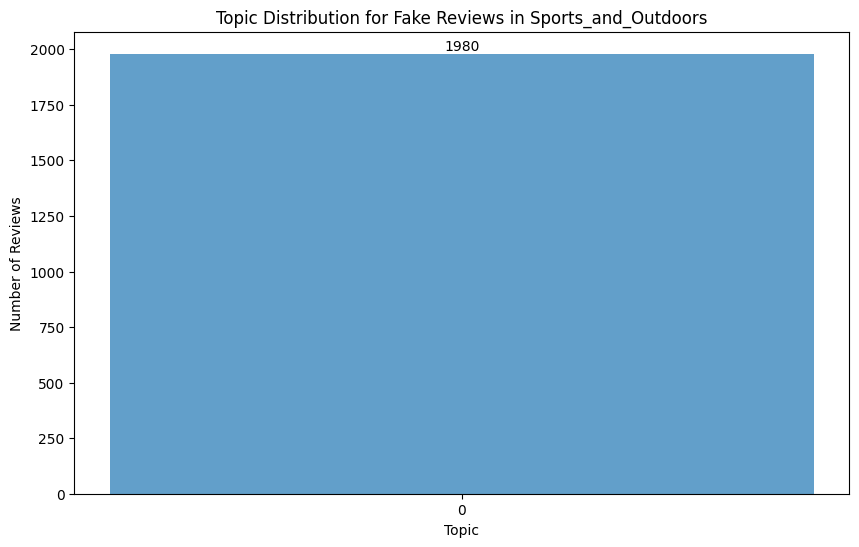


Category: Electronics
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 419.81659803615673
Number of Topics: 2, Perplexity: 405.9775317147336
Number of Topics: 3, Perplexity: 402.1529960142317
Number of Topics: 4, Perplexity: 403.3798922724942
Number of Topics: 5, Perplexity: 400.5167089573598
Number of Topics: 6, Perplexity: 393.2751539966958
Number of Topics: 7, Perplexity: 391.68676521547894
Number of Topics: 8, Perplexity: 389.8984777811138
Number of Topics: 9, Perplexity: 390.2567033173847
Number of Topics: 10, Perplexity: 391.22860129330275
Number of Topics: 11, Perplexity: 393.0103593636171
Early stopping triggered after 11 topics.


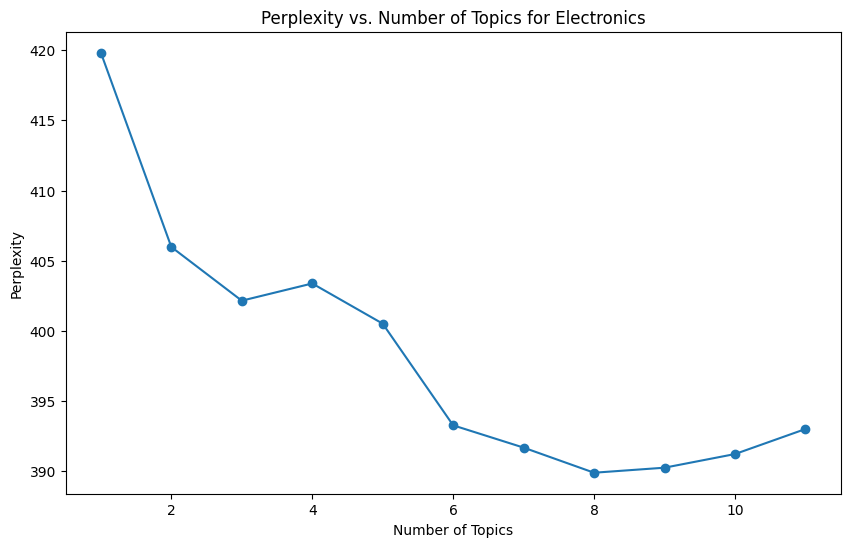

Optimal number of topics for Electronics: 8
Topics:
Topic 1:
great works product price little sound nice used quality good
Topic 2:
trs use 80 does macbook pro keyboard using bought usb
Topic 3:
case small like nice use little plastic easy screen great
Topic 4:
camera lens good great sony use canon used quality ve
Topic 5:
good reason small problem bit quality gave stars plastic little
Topic 6:
sound quality good pair headphones speakers clear great music ear
Topic 7:
battery product great bought phone good works life review charge
Topic 8:
tv drive bought replace use hard works did recommend just
Topic Counts for Electronics: [272 178 313 247 250 192 194 362]


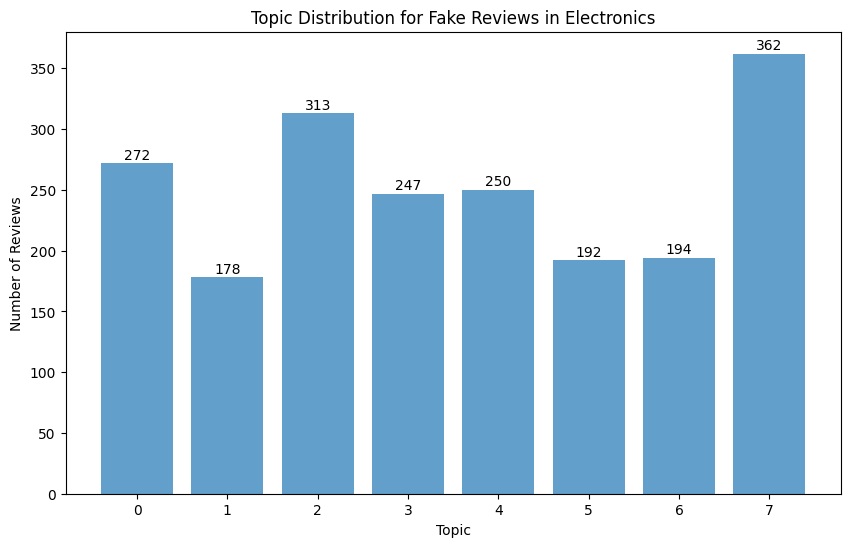


Category: Movies_and_TV
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 239.12184916545434
Number of Topics: 2, Perplexity: 216.0843725572468
Number of Topics: 3, Perplexity: 211.21264288752994
Number of Topics: 4, Perplexity: 208.49763950301474
Number of Topics: 5, Perplexity: 208.64998686138446
Number of Topics: 6, Perplexity: 206.03763096819117
Number of Topics: 7, Perplexity: 208.36705926773962
Number of Topics: 8, Perplexity: 198.87461457912684
Number of Topics: 9, Perplexity: 198.01370325785683
Number of Topics: 10, Perplexity: 197.14440784155533
Number of Topics: 11, Perplexity: 195.43052937924887
Number of Topics: 12, Perplexity: 191.79443938389576
Number of Topics: 13, Perplexity: 194.36139557117437
Number of Topics: 14, Perplexity: 193.17980075296856
Number of Topics: 15, Perplexity: 194.6407706847754
Early stopping triggered after 15 topics.


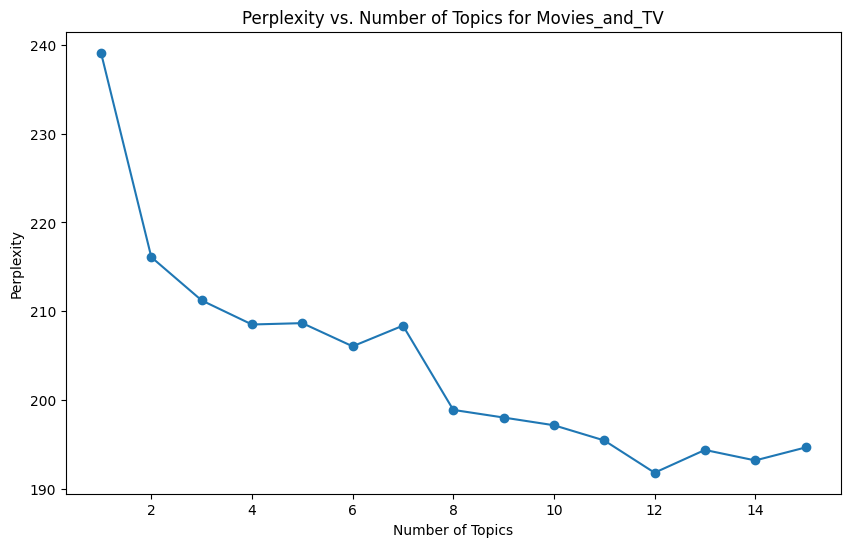

Optimal number of topics for Movies_and_TV: 12
Topics:
Topic 1:
movie good great watch recommend like story movies ending fan
Topic 2:
film disc book world trilogy lord people war important father
Topic 3:
great action movie excellent picture screenwriter lot set actors quality
Topic 4:
movie lot fact guy guys fight better documentary story pretty
Topic 5:
movie good like season think don just characters story interesting
Topic 6:
film story series told great movie beautiful people true entertaining
Topic 7:
movie saw time did movies glad going watched just like
Topic 8:
special effects notch story superb acting excellent line movie film
Topic 9:
good acting story great movie pretty characters enjoyed really complete
Topic 10:
movie just bit predictable plot slow lot acting little time
Topic 11:
love movie characters great different really enjoyed fan good way
Topic 12:
man got woman ending young smart dream killer sorry storyline
Topic Counts for Movies_and_TV: [486  44 107  75 173 17

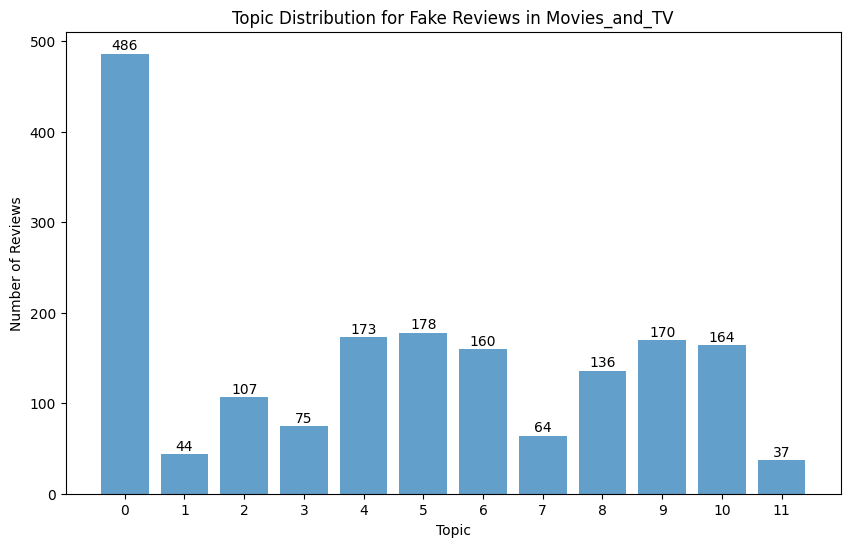


Category: Tools_and_Home_Improvement
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 388.4965194912888
Number of Topics: 2, Perplexity: 370.8835823199756
Number of Topics: 3, Perplexity: 371.3554827269912
Number of Topics: 4, Perplexity: 372.23882908856507
Number of Topics: 5, Perplexity: 372.98792591619787
Early stopping triggered after 5 topics.


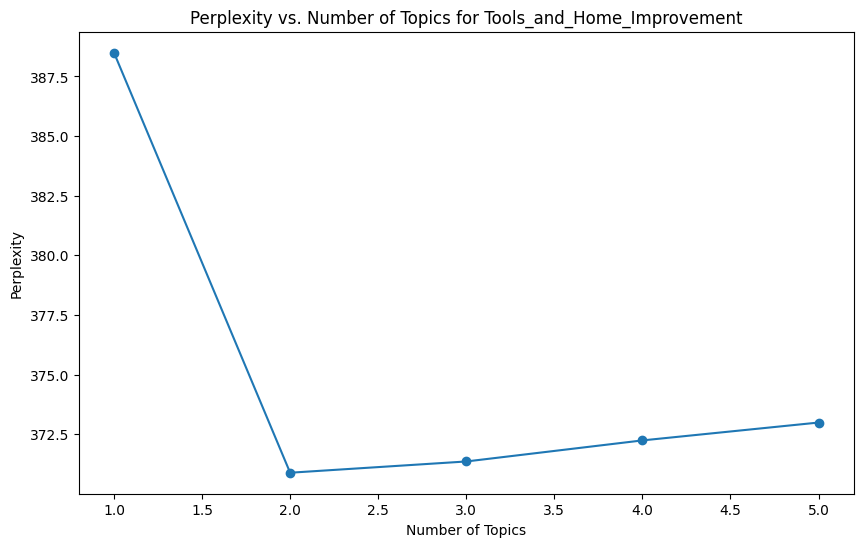

Optimal number of topics for Tools_and_Home_Improvement: 2
Topics:
Topic 1:
light great bright bulb works bought replace little nice love
Topic 2:
good tool great saw small plastic blade used use bosch
Topic Counts for Tools_and_Home_Improvement: [997 938]


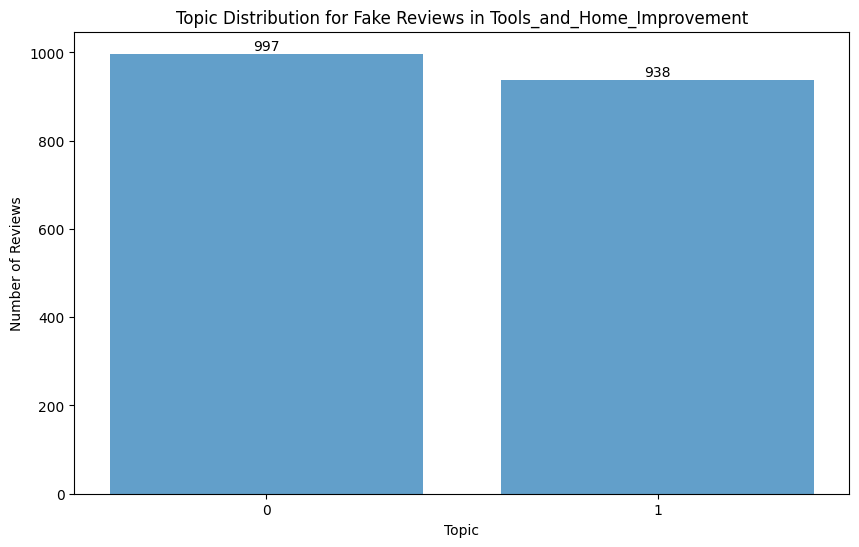


Category: Pet_Supplies
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 339.9644420718956
Number of Topics: 2, Perplexity: 334.1237955019927
Number of Topics: 3, Perplexity: 336.46572022994627
Number of Topics: 4, Perplexity: 340.3854540778581
Number of Topics: 5, Perplexity: 341.8966240733544
Early stopping triggered after 5 topics.


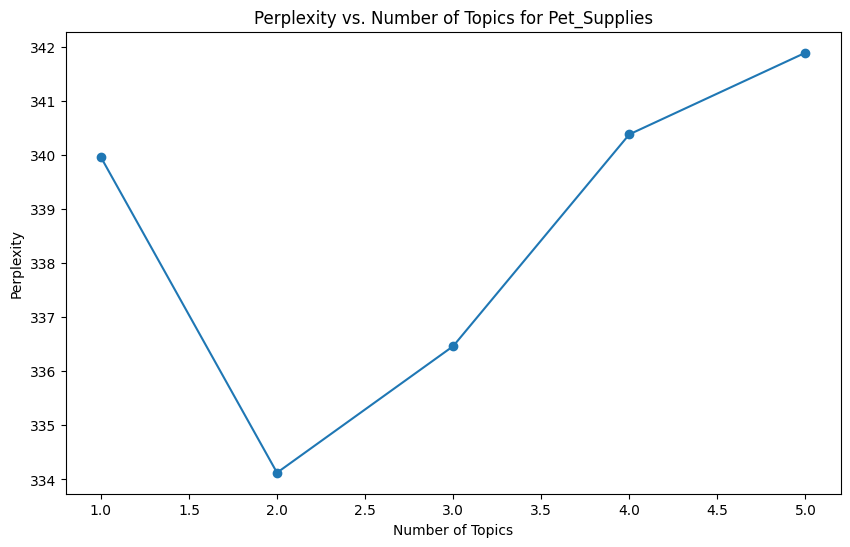

Optimal number of topics for Pet_Supplies: 2
Topics:
Topic 1:
dog great dogs product love food loves good bought small
Topic 2:
dog little small hard easy problem plastic bit cat collar
Topic Counts for Pet_Supplies: [1279  848]


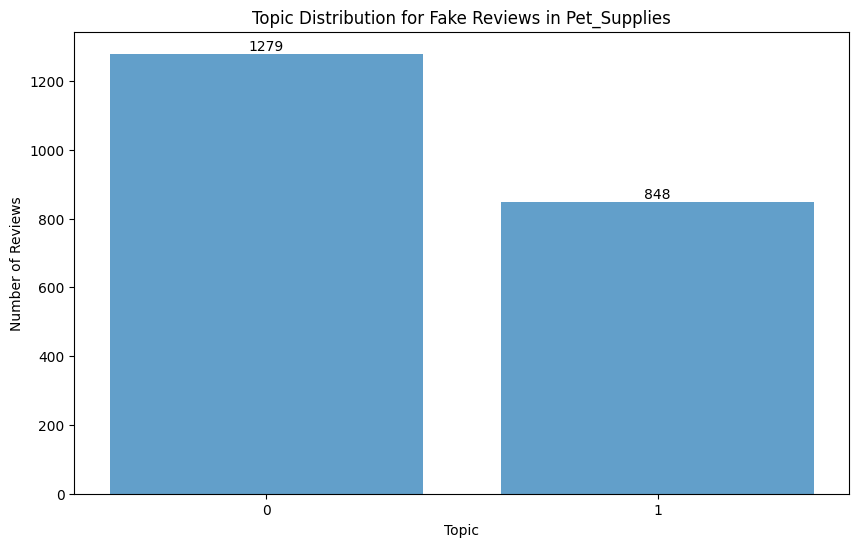


Category: Kindle_Store
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 182.01340596018872
Number of Topics: 2, Perplexity: 179.1354349430091
Number of Topics: 3, Perplexity: 174.2205740948937
Number of Topics: 4, Perplexity: 171.83236306603246
Number of Topics: 5, Perplexity: 170.43768741869116
Number of Topics: 6, Perplexity: 170.9639438263058
Number of Topics: 7, Perplexity: 171.58922420902235
Number of Topics: 8, Perplexity: 171.66113641693065
Early stopping triggered after 8 topics.


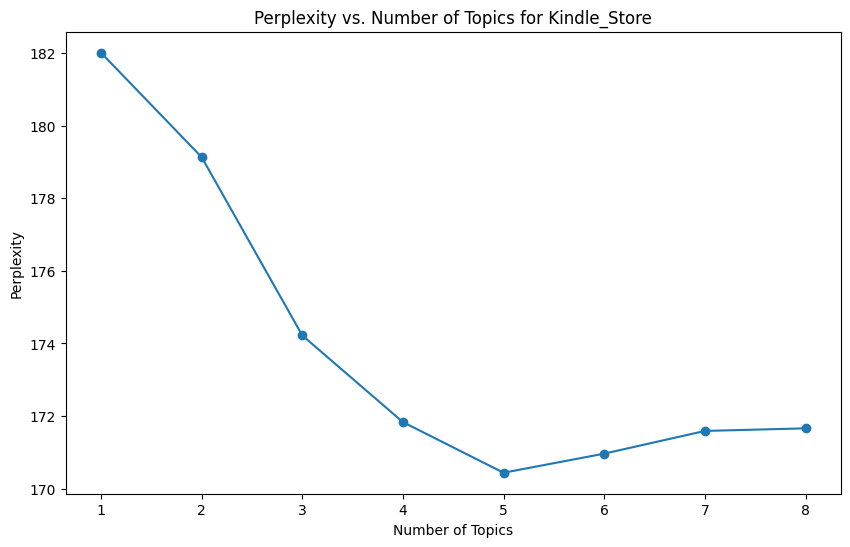

Optimal number of topics for Kindle_Store: 5
Topics:
Topic 1:
book read story characters series author reading great loved enjoyed
Topic 2:
story book characters read developed written good great enjoyed recommend
Topic 3:
review honest book exchange received copy free author arc story
Topic 4:
story strong woman love man loved town way family great
Topic 5:
story liked book good characters bit little ending author read
Topic Counts for Kindle_Store: [785 744 122 270 444]


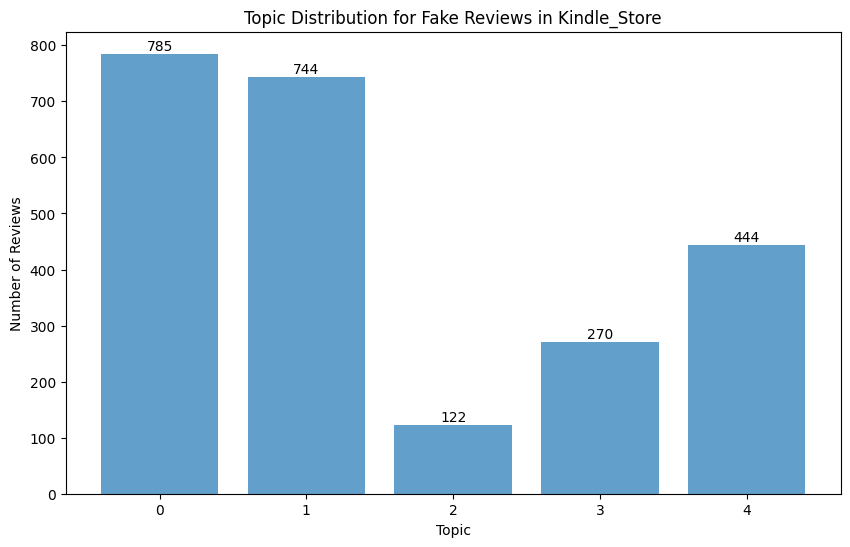


Category: Books
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 260.46628338742477
Number of Topics: 2, Perplexity: 239.0404545585591
Number of Topics: 3, Perplexity: 234.4162563734535
Number of Topics: 4, Perplexity: 232.5189365836321
Number of Topics: 5, Perplexity: 234.86085151594733
Number of Topics: 6, Perplexity: 234.9450411951743
Number of Topics: 7, Perplexity: 230.57379774425075
Number of Topics: 8, Perplexity: 230.81205254286604
Number of Topics: 9, Perplexity: 229.26235017464734
Number of Topics: 10, Perplexity: 229.87962268590852
Number of Topics: 11, Perplexity: 230.2550462429787
Number of Topics: 12, Perplexity: 229.48622972284355
Early stopping triggered after 12 topics.


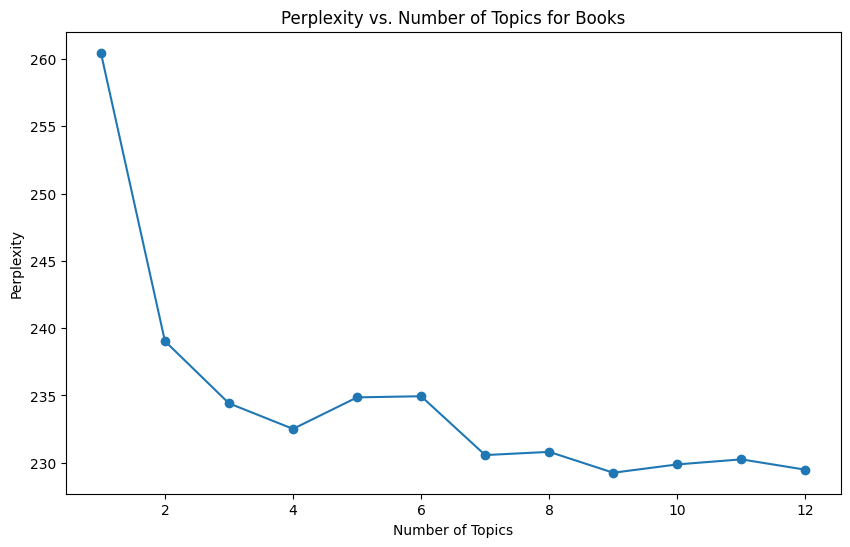

Optimal number of topics for Books: 9
Topics:
Topic 1:
love story characters book loved mystery told developed painting way
Topic 2:
story man girl woman young character main town small father
Topic 3:
book read books series good great recommend reading enjoyed loved
Topic 4:
book characters great read just think good love recommend does
Topic 5:
book good art read admit world story girls novel wants
Topic 6:
history thought historical family information military new interested setting role
Topic 7:
book story characters liked interesting like enjoyed ending good read
Topic 8:
book author murder guy way funny love man make job
Topic 9:
war point told view dresden files story real people civil
Topic Counts for Books: [221 111 832 175 106  43 518 130  56]


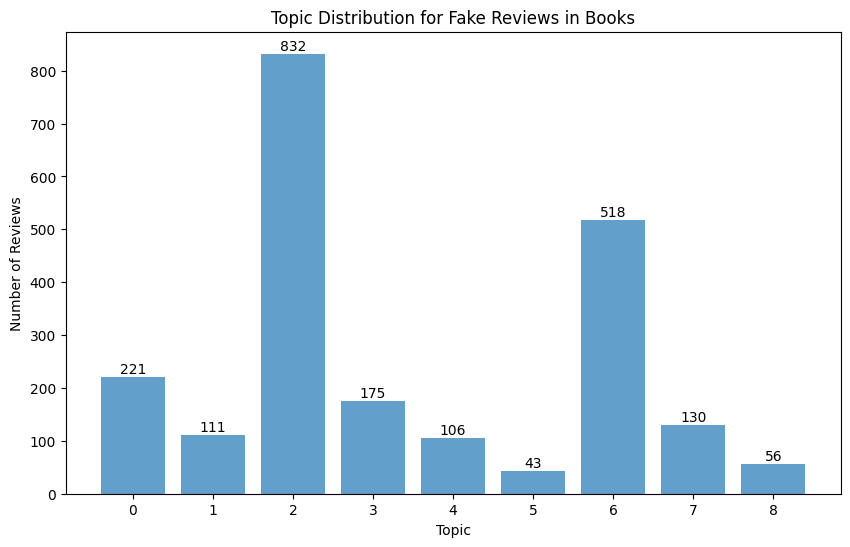


Category: Toys_and_Games
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 294.22096305321855
Number of Topics: 2, Perplexity: 284.50588473272705
Number of Topics: 3, Perplexity: 286.00538511835396
Number of Topics: 4, Perplexity: 287.2161101448546
Number of Topics: 5, Perplexity: 284.89145339727844
Early stopping triggered after 5 topics.


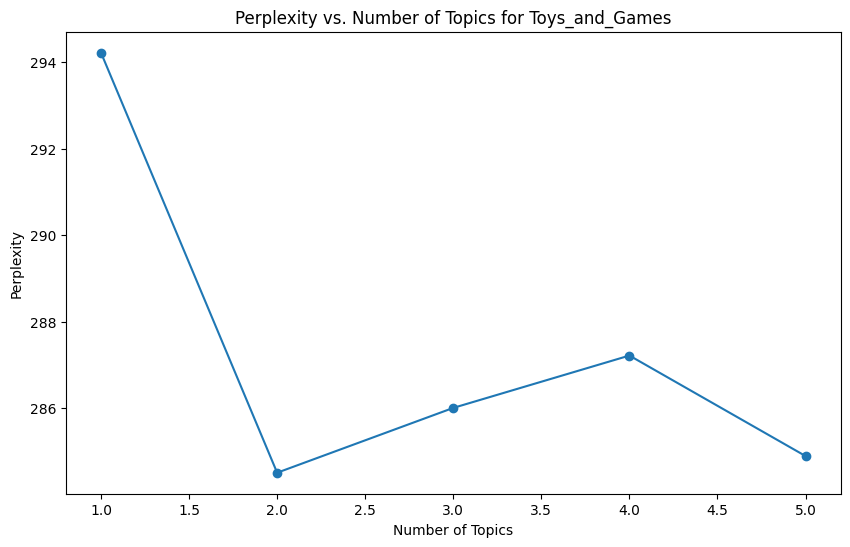

Optimal number of topics for Toys_and_Games: 2
Topics:
Topic 1:
game pieces set fun small plastic kids little play good
Topic 2:
loves great son toy little bought old daughter love pieces
Topic Counts for Toys_and_Games: [ 627 1277]


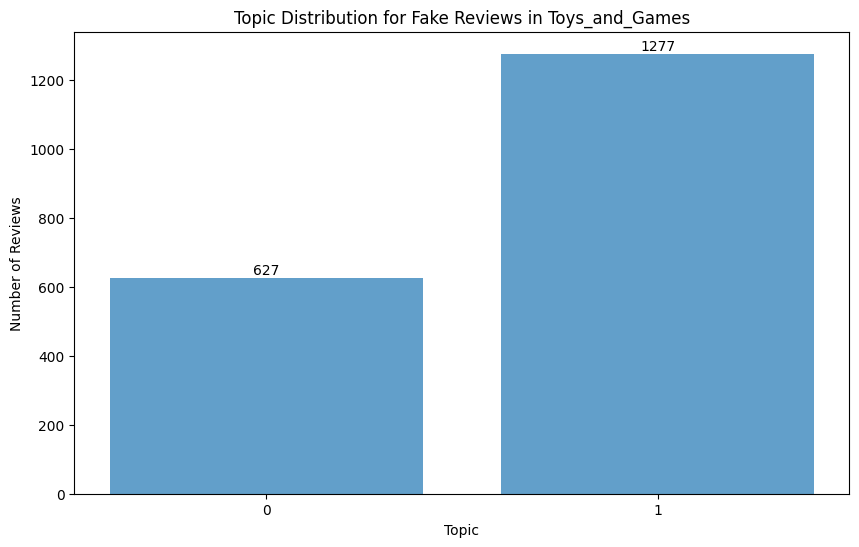


Category: Clothing_Shoes_and_Jewelry
Evaluating optimal number of topics...
Number of Topics: 1, Perplexity: 256.24990796729
Number of Topics: 2, Perplexity: 258.48159176635784
Number of Topics: 3, Perplexity: 258.800268254625
Number of Topics: 4, Perplexity: 264.23721018150036
Early stopping triggered after 4 topics.


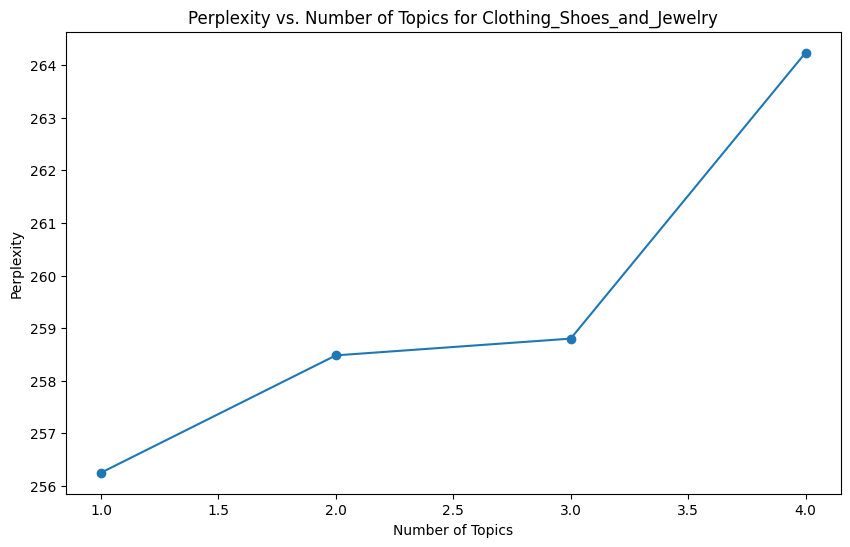

Optimal number of topics for Clothing_Shoes_and_Jewelry: 1
Topics:
Topic 1:
size comfortable fit little great wear love ordered nice bought
Topic Counts for Clothing_Shoes_and_Jewelry: [1931]


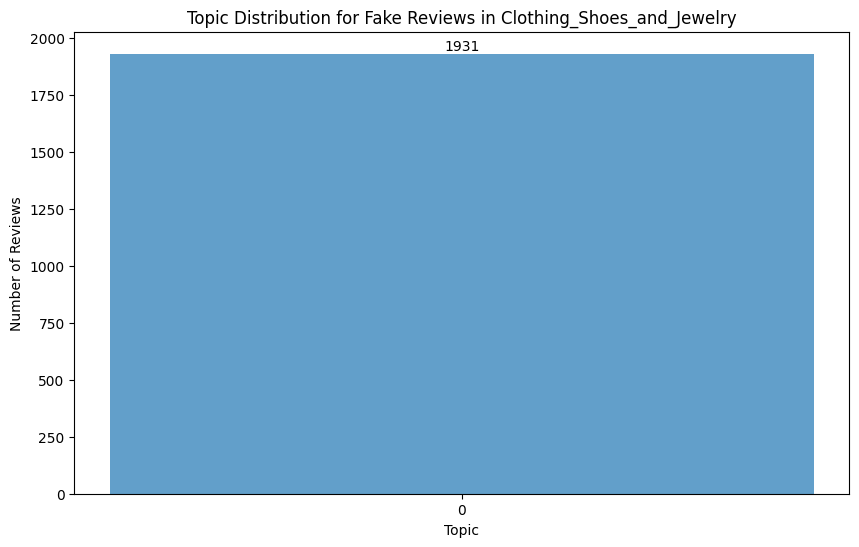

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

# Function to compute coherence/perplexity for different numbers of topics with early stopping
def evaluate_lda_models(text_data, min_topics=1, max_topics=20, early_stopping_rounds=3):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(text_data)
    perplexities = []
    no_improvement_count = 0
    best_perplexity = float('inf')

    for n_topics in range(min_topics, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(X)
        perplexity = lda.perplexity(X)
        perplexities.append(perplexity)
        print(f"Number of Topics: {n_topics}, Perplexity: {perplexity}")

        if perplexity < best_perplexity:
            best_perplexity = perplexity
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= early_stopping_rounds:
            print(f"Early stopping triggered after {n_topics} topics.")
            break

    return perplexities, vectorizer, X

# Step 3: Define a function to perform topic modeling for each category
def topic_modeling_by_category(df, category_column, text_column, label_column, min_topics=1, max_topics=20, no_top_words=10, early_stopping_rounds=3):
    categories = df[category_column].unique()
    results = {}

    for category in categories:
        print(f"\nCategory: {category}")
        category_reviews = df[(df[category_column] == category) & (df[label_column] == 1)]

        if category_reviews.empty:
            print("No fake reviews found for this category.")
            continue

        print("Evaluating optimal number of topics...")
        perplexities, vectorizer, X = evaluate_lda_models(
            category_reviews[text_column],
            min_topics=min_topics,
            max_topics=max_topics,
            early_stopping_rounds=early_stopping_rounds
        )

        plt.figure(figsize=(10, 6))
        plt.plot(range(min_topics, min_topics + len(perplexities)), perplexities, marker='o')
        plt.xlabel('Number of Topics')
        plt.ylabel('Perplexity')
        plt.title(f'Perplexity vs. Number of Topics for {category}')
        plt.show()

        optimal_n_topics = np.argmin(perplexities) + min_topics
        print(f"Optimal number of topics for {category}: {optimal_n_topics}")

        lda = LatentDirichletAllocation(n_components=optimal_n_topics, random_state=42)
        lda.fit(X)
        feature_names = vectorizer.get_feature_names_out()

        print("Topics:")
        for topic_idx, topic in enumerate(lda.components_):
            print(f"Topic {topic_idx + 1}:")
            print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

        topic_distribution = lda.transform(X)
        results[category] = {
            "lda": lda,
            "vectorizer": vectorizer,
            "topic_distribution": topic_distribution
        }

        topic_counts = np.bincount(topic_distribution.argmax(axis=1), minlength=optimal_n_topics)
        print(f"Topic Counts for {category}: {topic_counts}")

        plt.figure(figsize=(10, 6))
        bars = plt.bar(range(optimal_n_topics), topic_counts, align='center', alpha=0.7)
        plt.xticks(range(optimal_n_topics))
        plt.xlabel('Topic')
        plt.ylabel('Number of Reviews')
        plt.title(f'Topic Distribution for Fake Reviews in {category}')

        # Annotate the bar plot with the counts
        for bar, count in zip(bars, topic_counts):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count), ha='center', va='bottom')

        plt.show()

    return results

# Step 4: Apply the function to the dataset
results = topic_modeling_by_category(
    df,
    category_column='category',
    text_column='text',
    label_column='label',
    min_topics=1,
    max_topics=20,
    early_stopping_rounds=3
)

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

# Function to compute coherence/perplexity for different numbers of topics with early stopping
def evaluate_lda_models(text_data, min_topics=1, max_topics=20, early_stopping_rounds=3):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(text_data)
    perplexities = []
    no_improvement_count = 0
    best_perplexity = float('inf')

    for n_topics in range(min_topics, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(X)
        perplexity = lda.perplexity(X)
        perplexities.append(perplexity)

        if perplexity < best_perplexity:
            best_perplexity = perplexity
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= early_stopping_rounds:
            break

    return perplexities, vectorizer, X

# Function to perform topic modeling and cluster topics across categories
def topic_modeling_and_clustering(df, category_column, text_column, label_column, min_topics=1, max_topics=20, no_top_words=10, early_stopping_rounds=3, n_clusters=5):
    categories = df[category_column].unique()
    all_topic_vectors = []
    topic_labels = []
    vectorizers = {}
    lda_models = {}

    for category in categories:
        category_reviews = df[(df[category_column] == category) & (df[label_column] == 1)]
        if category_reviews.empty:
            continue

        perplexities, vectorizer, X = evaluate_lda_models(
            category_reviews[text_column],
            min_topics=min_topics,
            max_topics=max_topics,
            early_stopping_rounds=early_stopping_rounds
        )

        optimal_n_topics = np.argmin(perplexities) + min_topics
        lda = LatentDirichletAllocation(n_components=optimal_n_topics, random_state=42)
        lda.fit(X)
        lda_models[category] = lda
        vectorizers[category] = vectorizer

        # Collect topic-word distributions
        all_topic_vectors.extend(lda.components_)
        topic_labels.extend([f"{category}_Topic_{i+1}" for i in range(optimal_n_topics)])

    # Cluster topics across categories
    all_topic_vectors = np.array(all_topic_vectors)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(all_topic_vectors)

    # Summarize clusters
    cluster_summary = {}
    for cluster_id in range(n_clusters):
        cluster_topics = [topic_labels[i] for i in range(len(cluster_labels)) if cluster_labels[i] == cluster_id]
        cluster_words = np.mean(all_topic_vectors[cluster_labels == cluster_id], axis=0).argsort()[-no_top_words:][::-1]
        cluster_summary[cluster_id] = {
            "topics": cluster_topics,
            "keywords": [vectorizers[categories[0]].get_feature_names_out()[i] for i in cluster_words]
        }

    # Print cluster summaries
    for cluster_id, summary in cluster_summary.items():
        print(f"\nCluster {cluster_id}:")
        print(f"Topics: {', '.join(summary['topics'])}")
        print(f"Keywords: {', '.join(summary['keywords'])}")

    return cluster_summary

# Apply the function to the dataset
cluster_summary = topic_modeling_and_clustering(
    df,
    category_column='category',
    text_column='text',
    label_column='label',
    min_topics=1,
    max_topics=20,
    no_top_words=10,
    early_stopping_rounds=3,
    n_clusters=5
)


Cluster 0:
Topics: Home_and_Kitchen_Topic_1, Home_and_Kitchen_Topic_2, Electronics_Topic_1, Electronics_Topic_2, Electronics_Topic_3, Electronics_Topic_4, Electronics_Topic_5, Electronics_Topic_6, Electronics_Topic_7, Electronics_Topic_8, Movies_and_TV_Topic_1, Movies_and_TV_Topic_2, Movies_and_TV_Topic_3, Movies_and_TV_Topic_4, Movies_and_TV_Topic_5, Movies_and_TV_Topic_6, Movies_and_TV_Topic_7, Movies_and_TV_Topic_8, Movies_and_TV_Topic_9, Movies_and_TV_Topic_10, Movies_and_TV_Topic_11, Movies_and_TV_Topic_12, Tools_and_Home_Improvement_Topic_1, Tools_and_Home_Improvement_Topic_2, Pet_Supplies_Topic_1, Pet_Supplies_Topic_2, Kindle_Store_Topic_3, Kindle_Store_Topic_4, Kindle_Store_Topic_5, Books_Topic_1, Books_Topic_2, Books_Topic_4, Books_Topic_5, Books_Topic_6, Books_Topic_7, Books_Topic_8, Books_Topic_9, Toys_and_Games_Topic_1, Toys_and_Games_Topic_2
Keywords: option, easy, stand, haven, hand, blanket, hair, materials, measuring, heats

Cluster 1:
Topics: Books_Topic_3
Keywords: b

In [25]:
# Cluster results (manually extracted from your output)
clusters = {
    0: {
        "topics": [
            "Home_and_Kitchen_Topic_1", "Home_and_Kitchen_Topic_2", "Electronics_Topic_1", "Electronics_Topic_2",
            "Electronics_Topic_3", "Electronics_Topic_4", "Electronics_Topic_5", "Electronics_Topic_6",
            "Electronics_Topic_7", "Electronics_Topic_8", "Movies_and_TV_Topic_1", "Movies_and_TV_Topic_2",
            "Movies_and_TV_Topic_3", "Movies_and_TV_Topic_4", "Movies_and_TV_Topic_5", "Movies_and_TV_Topic_6",
            "Movies_and_TV_Topic_7", "Movies_and_TV_Topic_8", "Movies_and_TV_Topic_9", "Movies_and_TV_Topic_10",
            "Movies_and_TV_Topic_11", "Movies_and_TV_Topic_12", "Tools_and_Home_Improvement_Topic_1",
            "Tools_and_Home_Improvement_Topic_2", "Pet_Supplies_Topic_1", "Pet_Supplies_Topic_2",
            "Kindle_Store_Topic_3", "Kindle_Store_Topic_4", "Kindle_Store_Topic_5", "Books_Topic_1",
            "Books_Topic_2", "Books_Topic_4", "Books_Topic_5", "Books_Topic_6", "Books_Topic_7",
            "Books_Topic_8", "Books_Topic_9", "Toys_and_Games_Topic_1", "Toys_and_Games_Topic_2"
        ],
        "keywords": ["option", "easy", "stand", "haven", "hand", "blanket", "hair", "materials", "measuring", "heats"]
    },
    1: {
        "topics": ["Books_Topic_3"],
        "keywords": ["blanket", "removable", "blender", "sister", "good", "green", "review", "replaced", "does", "matter"]
    },
    2: {
        "topics": ["Sports_and_Outdoors_Topic_1"],
        "keywords": ["hands", "lot", "hand", "unbiased", "slept", "press", "electric", "candle", "noisy", "read"]
    },
    3: {
        "topics": ["Kindle_Store_Topic_1", "Kindle_Store_Topic_2"],
        "keywords": ["big", "remove", "stand", "bunch", "grip", "grandson", "discount", "sit", "attachments", "replaced"]
    },
    4: {
        "topics": ["Clothing_Shoes_and_Jewelry_Topic_1"],
        "keywords": ["shelf", "cordless", "floor", "liking", "guy", "wanted", "lovely", "original", "night", "candle"]
    }
}

# Summarize clusters into readable topics
cluster_summaries = {}
for cluster_id, cluster_data in clusters.items():
    keywords = ", ".join(cluster_data["keywords"][:5])  # Use top 5 keywords for brevity
    cluster_summaries[cluster_id] = {
        "summary": f"Cluster {cluster_id}: Focus on '{keywords}'",
        "topic_count": len(cluster_data["topics"])
    }

# Calculate distribution
total_topics = sum(summary["topic_count"] for summary in cluster_summaries.values())
distribution = {
    cluster_id: {
        "percentage": round((summary["topic_count"] / total_topics) * 100, 2),
        "summary": summary["summary"]
    }
    for cluster_id, summary in cluster_summaries.items()
}

# Print summaries and distribution
print("Cluster Summaries:")
for cluster_id, summary in cluster_summaries.items():
    print(f"{summary['summary']} ({summary['topic_count']} topics)")

print("\nDistribution of Topics Across Clusters:")
for cluster_id, dist in distribution.items():
    print(f"Cluster {cluster_id}: {dist['percentage']}% - {dist['summary']}")

Cluster Summaries:
Cluster 0: Focus on 'option, easy, stand, haven, hand' (39 topics)
Cluster 1: Focus on 'blanket, removable, blender, sister, good' (1 topics)
Cluster 2: Focus on 'hands, lot, hand, unbiased, slept' (1 topics)
Cluster 3: Focus on 'big, remove, stand, bunch, grip' (2 topics)
Cluster 4: Focus on 'shelf, cordless, floor, liking, guy' (1 topics)

Distribution of Topics Across Clusters:
Cluster 0: 88.64% - Cluster 0: Focus on 'option, easy, stand, haven, hand'
Cluster 1: 2.27% - Cluster 1: Focus on 'blanket, removable, blender, sister, good'
Cluster 2: 2.27% - Cluster 2: Focus on 'hands, lot, hand, unbiased, slept'
Cluster 3: 4.55% - Cluster 3: Focus on 'big, remove, stand, bunch, grip'
Cluster 4: 2.27% - Cluster 4: Focus on 'shelf, cordless, floor, liking, guy'


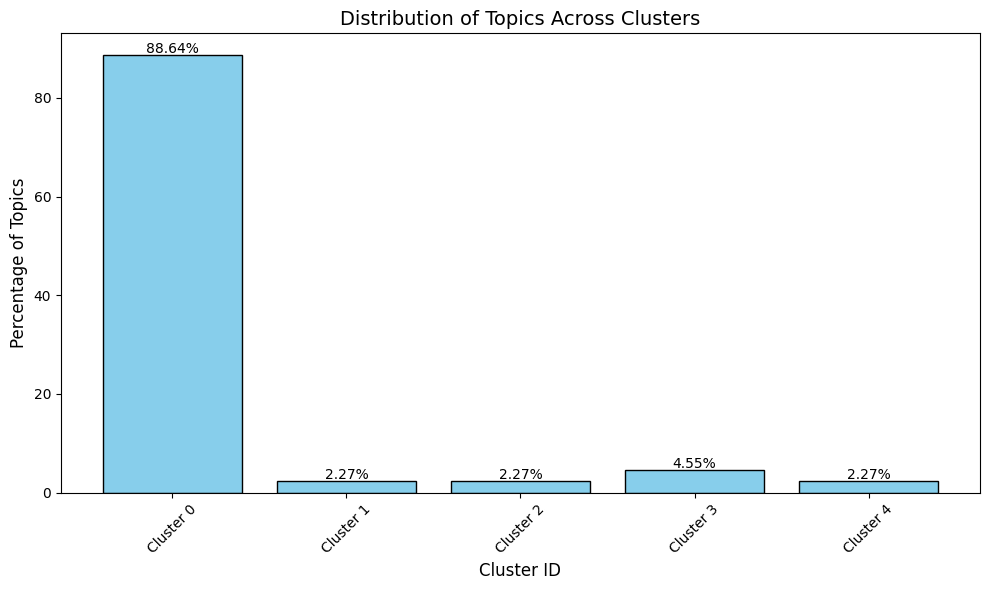

In [26]:
import matplotlib.pyplot as plt

# Prepare data for visualization
cluster_ids = list(distribution.keys())
percentages = [dist["percentage"] for dist in distribution.values()]
summaries = [dist["summary"] for dist in distribution.values()]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cluster_ids, percentages, color='skyblue', edgecolor='black')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Percentage of Topics', fontsize=12)
plt.title('Distribution of Topics Across Clusters', fontsize=14)
plt.xticks(cluster_ids, [f"Cluster {cid}" for cid in cluster_ids], rotation=45)
plt.tight_layout()

# Annotate bars with percentages
for i, percentage in enumerate(percentages):
    plt.text(cluster_ids[i], percentage + 0.5, f"{percentage}%", ha='center', fontsize=10)

# Show the plot
plt.show()

In [27]:
def generate_cluster_descriptions(cluster_summary):
    cluster_descriptions = {}
    for cluster_id, summary in cluster_summary.items():
        topics = summary['topics']
        keywords = summary['keywords']

        # Generate a description based on topics and keywords
        if len(topics) > 5:
            description = (
                f"Cluster {cluster_id} contains a wide variety of topics, including {', '.join(topics[:5])}, and more. "
                f"The keywords suggest these reviews are generic and cover diverse aspects like {', '.join(keywords[:3])}."
            )
        elif "emotion" in keywords or "personal" in keywords:
            description = (
                f"Cluster {cluster_id} focuses on emotionally driven reviews, with topics like {', '.join(topics[:3])}. "
                f"The keywords {', '.join(keywords[:3])} indicate these reviews aim to appeal to personal preferences."
            )
        else:
            description = (
                f"Cluster {cluster_id} highlights specific topics such as {', '.join(topics[:3])}. "
                f"The keywords {', '.join(keywords[:3])} suggest these reviews are targeted and detailed."
            )

        cluster_descriptions[cluster_id] = description

    return cluster_descriptions

# Generate descriptions for the clusters
cluster_descriptions = generate_cluster_descriptions(cluster_summary)

# Print the descriptions
for cluster_id, description in cluster_descriptions.items():
    print(f"Cluster {cluster_id}: {description}")

Cluster 0: Cluster 0 contains a wide variety of topics, including Home_and_Kitchen_Topic_1, Home_and_Kitchen_Topic_2, Electronics_Topic_1, Electronics_Topic_2, Electronics_Topic_3, and more. The keywords suggest these reviews are generic and cover diverse aspects like option, easy, stand.
Cluster 1: Cluster 1 highlights specific topics such as Books_Topic_3. The keywords blanket, removable, blender suggest these reviews are targeted and detailed.
Cluster 2: Cluster 2 highlights specific topics such as Sports_and_Outdoors_Topic_1. The keywords hands, lot, hand suggest these reviews are targeted and detailed.
Cluster 3: Cluster 3 highlights specific topics such as Kindle_Store_Topic_1, Kindle_Store_Topic_2. The keywords big, remove, stand suggest these reviews are targeted and detailed.
Cluster 4: Cluster 4 highlights specific topics such as Clothing_Shoes_and_Jewelry_Topic_1. The keywords shelf, cordless, floor suggest these reviews are targeted and detailed.


In [29]:
def generate_cluster_descriptions(cluster_summary):
    cluster_descriptions = {}
    for cluster_id, summary in cluster_summary.items():
        topics = summary['topics']
        keywords = summary['keywords']

        # Analyze topics and keywords to infer context
        topic_count = len(topics)
        keyword_count = len(keywords)

        # Dynamically construct the description
        description = f"Cluster {cluster_id} contains reviews that discuss {topic_count} topics and highlight {keyword_count} key aspects. "
        description += f"The most prominent topics include {', '.join(topics[:3])}. "
        description += f"Keywords such as {', '.join(keywords[:3])} provide further insight into the focus of these reviews."

        cluster_descriptions[cluster_id] = description

    return cluster_descriptions

# Generate descriptions for the clusters
cluster_descriptions = generate_cluster_descriptions(cluster_summary)

# Print the descriptions
for cluster_id, description in cluster_descriptions.items():
    print(f"Cluster {cluster_id}: {description}")

Cluster 0: Cluster 0 contains reviews that discuss 39 topics and highlight 10 key aspects. The most prominent topics include Home_and_Kitchen_Topic_1, Home_and_Kitchen_Topic_2, Electronics_Topic_1. Keywords such as option, easy, stand provide further insight into the focus of these reviews.
Cluster 1: Cluster 1 contains reviews that discuss 1 topics and highlight 10 key aspects. The most prominent topics include Books_Topic_3. Keywords such as blanket, removable, blender provide further insight into the focus of these reviews.
Cluster 2: Cluster 2 contains reviews that discuss 1 topics and highlight 10 key aspects. The most prominent topics include Sports_and_Outdoors_Topic_1. Keywords such as hands, lot, hand provide further insight into the focus of these reviews.
Cluster 3: Cluster 3 contains reviews that discuss 2 topics and highlight 10 key aspects. The most prominent topics include Kindle_Store_Topic_1, Kindle_Store_Topic_2. Keywords such as big, remove, stand provide further ins

### Using n-grams

Evaluating optimal number of topics for all fake reviews...
Number of Topics: 2, Coherence Score: 0.36434151036896467
Number of Topics: 3, Coherence Score: 0.6031896950569106
Number of Topics: 4, Coherence Score: 0.6300629668453466
Number of Topics: 5, Coherence Score: 0.681889399797323
Number of Topics: 6, Coherence Score: 0.7652481326229471
Number of Topics: 7, Coherence Score: 0.6994720186885937
Coherence score stabilized or threshold reached.


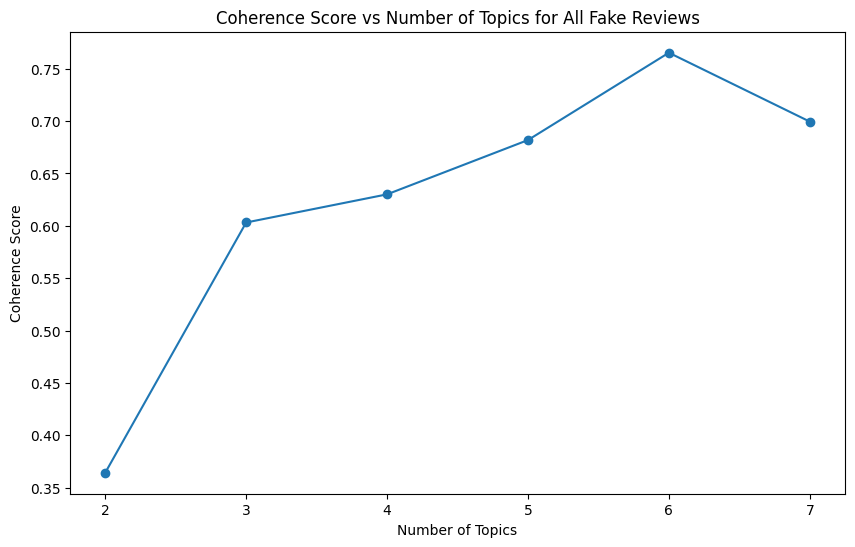

Optimal number of topics: 6
Topics:
Topic 1:
fit perfectly | ordered size | size fit | material soft | fit perfect | couple year | wear size | bit small | work great | highly recommend
Topic 2:
acting good | good movie | good acting | good acting good | movie good | good story | acting good acting | great movie | story good | special effect
Topic 3:
read book | character developed | enjoyed book | book series | story told | recommend book | really enjoyed | book read | forward reading | exchange honest
Topic 4:
reason gave | gave star | reason gave star | good quality | quality good | material good | exchange honest | good reason | look great | star plastic
Topic 5:
year old | work great | son love | love love | highly recommend | great price | bought replace | easy clean | easy use | definitely recommend
Topic 6:
dog love | bought friend | small dog | problem kind | kind hard | problem kind hard | cat love | german shepherd | bought friend small | friend small


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# Preprocessing function
def preprocess_text(text, custom_stopwords=None):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(words)

# Function to calculate coherence score using gensim
def calculate_coherence_score(lda_model, X, vectorizer):
    feature_names = vectorizer.get_feature_names_out()
    topics = [[feature_names[i] for i in topic.argsort()[:-10 - 1:-1]] for topic in lda_model.components_]

    # Convert sparse matrix X to a list of tokenized documents
    corpus = [[feature_names[i] for i in doc.nonzero()[1]] for doc in X]

    dictionary = Dictionary(corpus)
    coherence_model = CoherenceModel(topics=topics, texts=corpus, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Function to evaluate LDA models dynamically using a while loop
def evaluate_lda_with_while(text_data, ngram_range=(2, 3), min_df=10, max_df=0.8, threshold=0.01, max_topics=20):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range, min_df=min_df, max_df=max_df)
    X = vectorizer.fit_transform(text_data)

    n_topics = 2  # Start with 2 topics
    previous_score = 0
    coherence_scores = []

    while n_topics <= max_topics:
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(X)

        coherence_score = calculate_coherence_score(lda, X, vectorizer)
        coherence_scores.append(coherence_score)

        print(f"Number of Topics: {n_topics}, Coherence Score: {coherence_score}")

        # Stop if coherence score improves less than the threshold
        if coherence_score - previous_score < threshold:
            print("Coherence score stabilized or threshold reached.")
            break

        previous_score = coherence_score
        n_topics += 1  # Increment the number of topics

    return coherence_scores, vectorizer, X, n_topics - 1

# Topic modeling function for all fake reviews
def topic_modeling_all_fake_reviews(df, text_column, label_column, custom_stopwords=None):
    # Preprocess all reviews
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(x, custom_stopwords))

    # Filter fake reviews
    fake_reviews = df[df[label_column] == 1][text_column]

    if fake_reviews.empty:
        print("No fake reviews found in the dataset.")
        return

    print("Evaluating optimal number of topics for all fake reviews...")
    coherence_scores, vectorizer, X, optimal_n_topics = evaluate_lda_with_while(
        fake_reviews,
        ngram_range=(2, 3),  # Use bigrams and trigrams
        min_df=10,  # Filter rare n-grams
        max_df=0.8,  # Filter overly frequent terms
        threshold=0.01,
        max_topics=20
    )

    # Plot coherence scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 2 + len(coherence_scores)), coherence_scores, marker='o')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title('Coherence Score vs Number of Topics for All Fake Reviews')
    plt.show()

    print(f"Optimal number of topics: {optimal_n_topics}")

    # Fit LDA with optimal number of topics
    lda = LatentDirichletAllocation(n_components=optimal_n_topics, random_state=42)
    lda.fit(X)
    feature_names = vectorizer.get_feature_names_out()

    print("Topics:")
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# Example usage
# Assuming `df` is your DataFrame with columns: 'text' and 'label'
custom_stopwords = ['product', 'item', 'amazon', 'review']  # Add domain-specific stopwords
topic_modeling_all_fake_reviews(df, text_column='text', label_column='label', custom_stopwords=custom_stopwords)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Step 1: Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['text'])  # Use your actual data directly

# Step 2: Fit the LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components for the number of topics
lda.fit(X)

# Step 3: Convert the LDA model and data into PyLDAvis format
pyLDAvis.enable_notebook()  # Enable visualization in Jupyter Notebook
lda_vis = pyLDAvis.prepare(
    topic_term_dists=lda.components_,
    doc_topic_dists=lda.transform(X),
    doc_lengths=X.sum(axis=1).A1,
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=X.sum(axis=0).A1
)

# Step 4: Display the visualization
pyLDAvis.display(lda_vis)

/Users/alexlee/Library/Python/3.12/lib/python/site-packages/dateutil/tz/tz.py:37: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  EPOCH = datetime.datetime.utcfromtimestamp(0)
/Users/alexlee/Library/Python/3.12/lib/python/site-packages/dateutil/tz/tz.py:37: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  EPOCH = datetime.datetime.utcfromtimestamp(0)
/Users/alexlee/Library/Python/3.12/lib/python/site-packages/dateutil/tz/tz.py:37: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datet

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis

# Step 1: Vectorize the text data with n-grams (3-grams to 6-grams)
vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, ngram_range=(3, 6))
X = vectorizer.fit_transform(df['text'])  # Use your actual data directly

# Step 2: Fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)  # Adjust n_components for the number of topics
lda.fit(X)

# Step 3: Convert the LDA model and data into PyLDAvis format
pyLDAvis.enable_notebook()  # Enable visualization in Jupyter Notebook
lda_vis = pyLDAvis.prepare(
    topic_term_dists=lda.components_,
    doc_topic_dists=lda.transform(X),
    doc_lengths=X.sum(axis=1).A1,
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=X.sum(axis=0).A1
)

# Step 4: Display the visualization
pyLDAvis.display(lda_vis)

tried different things and nothign seems to give good results in terms of common theme across fake reveiws.

Average Polarity: 0.30085336461707096
Average Subjectivity: 0.5588393190686437


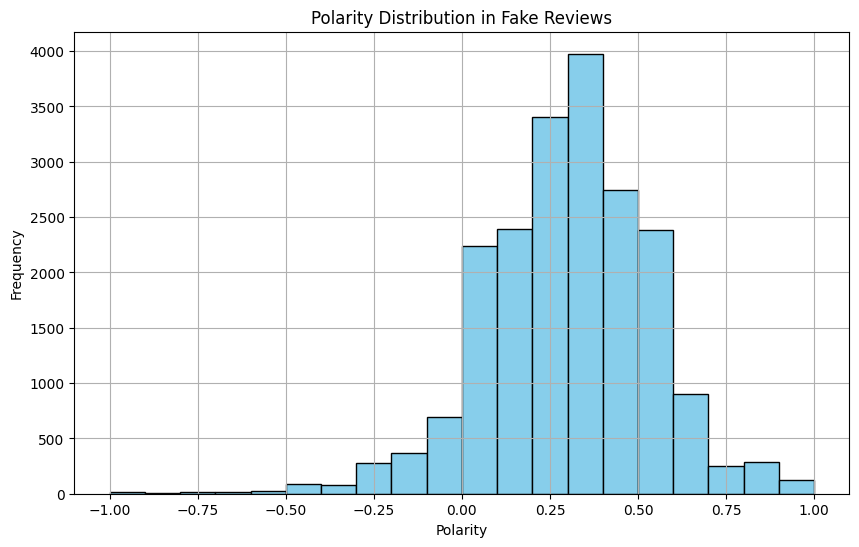

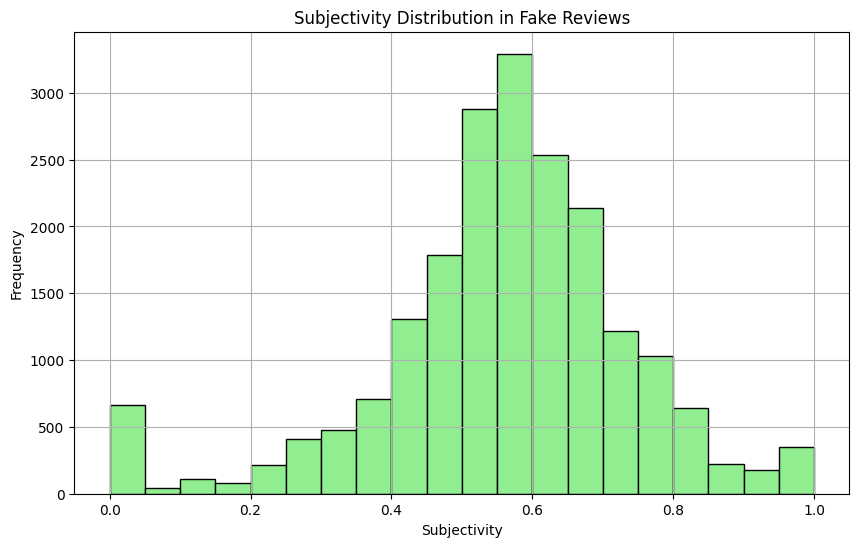

In [48]:
from textblob import TextBlob
import pandas as pd

# Step 1: Define a function to calculate sentiment polarity and subjectivity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return pd.Series({'polarity': blob.sentiment.polarity, 'subjectivity': blob.sentiment.subjectivity})

# Step 2: Apply sentiment analysis to the 'text' column
df[['polarity', 'subjectivity']] = df['text'].apply(analyze_sentiment)

# Step 3: Analyze trends in fake reviews
# Example: Average polarity and subjectivity
average_polarity = df['polarity'].mean()
average_subjectivity = df['subjectivity'].mean()

print(f"Average Polarity: {average_polarity}")
print(f"Average Subjectivity: {average_subjectivity}")

# Example: Distribution of polarity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['polarity'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Polarity Distribution in Fake Reviews')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
df['subjectivity'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Subjectivity Distribution in Fake Reviews')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

Sentiment Distribution:
sentiment_category
Neutral     16950
Positive     3254
Negative       69
Name: count, dtype: int64
Top phrases in positive reviews: [('good story', 246), ('story good', 245), ('work great', 240), ('great price', 137), ('read book', 135), ('great story', 128), ('story line', 127), ('quality good', 122), ('enjoyed book', 117), ('look great', 117)]
Top phrases in negative reviews: [('vampire boring', 17), ('guy smartest', 16), ('stupid guy', 16), ('boring vampire', 15), ('bra hate', 15), ('smartest man', 15), ('world stupid', 15), ('hate bra', 14), ('man world', 14), ('yes yes', 14)]
Top phrases in neutral reviews: [('read book', 1263), ('highly recommend', 992), ('character developed', 886), ('enjoyed book', 761), ('story told', 697), ('book series', 681), ('year old', 619), ('recommend book', 615), ('really enjoyed', 613), ('work great', 613)]


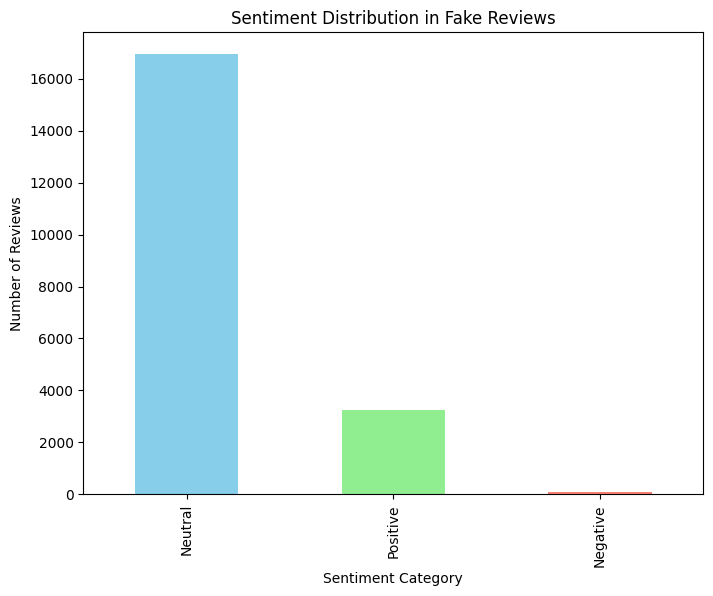

In [51]:
from textblob import TextBlob
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Step 1: Define a function to calculate sentiment polarity and subjectivity
def analyze_sentiment(text):
    blob = TextBlob(text)
    return pd.Series({'polarity': blob.sentiment.polarity, 'subjectivity': blob.sentiment.subjectivity})

# Step 2: Apply sentiment analysis to the 'text' column
df[['polarity', 'subjectivity']] = df['text'].apply(analyze_sentiment)

# Step 3: Categorize reviews into sentiment bins
def categorize_sentiment(polarity):
    if polarity > 0.5:
        return 'Positive'
    elif polarity < -0.5:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['polarity'].apply(categorize_sentiment)

# Step 4: Analyze sentiment trends
sentiment_distribution = df['sentiment_category'].value_counts()
print("Sentiment Distribution:")
print(sentiment_distribution)

# Step 5: Extract frequent phrases (n-grams) for each sentiment category
def extract_ngrams(text_series, n=2, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_counts = vectorizer.fit_transform(text_series)
    ngram_freq = Counter(dict(zip(vectorizer.get_feature_names_out(), ngram_counts.sum(axis=0).A1)))
    return ngram_freq.most_common(top_n)

positive_ngrams = extract_ngrams(df[df['sentiment_category'] == 'Positive']['text'], n=2)
negative_ngrams = extract_ngrams(df[df['sentiment_category'] == 'Negative']['text'], n=2)
neutral_ngrams = extract_ngrams(df[df['sentiment_category'] == 'Neutral']['text'], n=2)

print("Top phrases in positive reviews:", positive_ngrams)
print("Top phrases in negative reviews:", negative_ngrams)
print("Top phrases in neutral reviews:", neutral_ngrams)

# Step 6: Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Sentiment Distribution in Fake Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()